In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-photos/food photos/valid/Fattah/الفتة المصرية_57.jpg
/kaggle/input/food-photos/food photos/valid/Fattah/الفتة المصرية_46.jpg
/kaggle/input/food-photos/food photos/valid/Fattah/الفتة المصرية_85.jpg
/kaggle/input/food-photos/food photos/valid/Fattah/الفتة المصرية_75.jpg
/kaggle/input/food-photos/food photos/valid/Fattah/الفتة المصرية_47.jpg
/kaggle/input/food-photos/food photos/valid/Fattah/aug_0_5988.jpg
/kaggle/input/food-photos/food photos/valid/Fattah/الفتة المصرية_69.jpg
/kaggle/input/food-photos/food photos/valid/Fattah/الفتة المصرية_66.jpg
/kaggle/input/food-photos/food photos/valid/Fattah/aug_0_6006.jpg
/kaggle/input/food-photos/food photos/valid/Fattah/الفتة المصرية_99.jpg
/kaggle/input/food-photos/food photos/valid/Fattah/الفتة المصرية_86.jpg
/kaggle/input/food-photos/food photos/valid/Fattah/الفتة المصرية_84.jpg
/kaggle/input/food-photos/food photos/valid/Fattah/الفتة المصرية_33.jpg
/kaggle/input/food-photos/food photos/valid/Fattah/aug_0_487.jpg
/kaggle/inp

In [54]:
import os
import keras
from keras.utils import image_dataset_from_directory
from keras.applications.densenet import DenseNet169,preprocess_input
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers,models
from keras.optimizers import Adam
from keras.regularizers import l2
import matplotlib.pyplot as plt

In [25]:
# train_df
train_df=image_dataset_from_directory(
    '/kaggle/input/food-photos/food photos/train',
    image_size=(224,224),
    label_mode='categorical',
    shuffle=True,
    seed=42
)

#valid_df
valid_df=image_dataset_from_directory(
    '/kaggle/input/food-photos/food photos/valid',
    image_size=(224,224),
    label_mode='categorical',
    seed=42,
    shuffle=True,
    )

Found 576 files belonging to 9 classes.
Found 171 files belonging to 9 classes.


In [26]:
# test_df
test_df=image_dataset_from_directory(
    '/kaggle/input/food-photos/food photos/test',
    image_size=(224,224),
    batch_size=32,
    label_mode='categorical',
    seed=42
)

Found 130 files belonging to 9 classes.


In [27]:
train_df

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>

In [28]:
test_df

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>

In [29]:
valid_df

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>

In [30]:
base_model=DenseNet169(include_top=False,weights='imagenet',input_shape=(224,224,3))
base_model.summary()

Model: "densenet169"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_3… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 12,642,880 (48.23 MB)

 Trainable params: 12,484,480 (47.62 MB)

 Non-trainable params: 158,400 (618.75 KB)

In [31]:
base_model.trainable=False
base_model.summary()

Model: "densenet169"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_3… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 12,642,880 (48.23 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,642,880 (48.23 MB)

In [55]:
#bulid model

def bulid_model():
  inputs=layers.Input(shape=(224,224,3))
  hidd=layers.Lambda(preprocess_input)(inputs)
  hidd=base_model(hidd)
  #bulid attention mechanism layers
  att=layers.Conv2D(1664,(3,3),strides=1,padding='same',activation='relu')(hidd)
  att=layers.Conv2D(1664,(3,3),strides=1,padding='same',activation='sigmoid')(att)

  hidd=layers.Multiply()([hidd,att])
  hidd=layers.GlobalAveragePooling2D()(hidd)

  #Fully connected Layers
  hidd=layers.Dropout(0.2)(hidd)
  # hidd=layers.Dense(128,activation='relu',kernel_regularizer=l2(0.02))(hidd)
  hidd=layers.Dense(64,activation='relu',kernel_regularizer=l2(0.2))(hidd)
  hidd=layers.Dense(32,activation='relu',kernel_regularizer=l2(0.2))(hidd)
  outputs=layers.Dense(9,activation='softmax')(hidd)

  return inputs,outputs

inputs,outputs=bulid_model()
model=models.Model(inputs,outputs)
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_4 (Lambda)   │ (None, 224, 224,  │          0 │ input_layer_6[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ densenet169         │ (None, 7, 7,      │ 12,642,880 │ lambda_4[0][0]    │
│ (Functional)        │ 1664)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 7, 7,      │ 24,921,728 │ densenet169[3][0] │
│                     │ 1664)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 7, 7,      │ 24,921,728 │ conv2d_8[0][0]    │
│                     │ 1664)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_4          │ (None, 7, 7,      │          0 │ densenet169[3][0… │
│ (Multiply)          │ 1664)             │            │ conv2d_9[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1664)      │          0 │ multiply_4[0][0]  │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 1664)      │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 64)        │    106,560 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 32)        │      2,080 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 9)         │        297 │ dense_13[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 62,595,273 (238.78 MB)

 Trainable params: 49,952,393 (190.55 MB)

 Non-trainable params: 12,642,880 (48.23 MB)

In [56]:
model.compile(optimizer=Adam(learning_rate=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

In [57]:
history=model.fit(train_df,validation_data=valid_df,batch_size=32,
                  epochs=15 , callbacks=[early_stopping, model_checkpoint])

Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.1493 - loss: 35.5779 - val_accuracy: 0.1637 - val_loss: 35.3268
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 535ms/step - accuracy: 0.3008 - loss: 35.1500 - val_accuracy: 0.2807 - val_loss: 34.9828
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 541ms/step - accuracy: 0.3574 - loss: 34.8032 - val_accuracy: 0.4094 - val_loss: 34.6467
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 539ms/step - accuracy: 0.4353 - loss: 34.4697 - val_accuracy: 0.4327 - val_loss: 34.3355
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 541ms/step - accuracy: 0.5148 - loss: 34.1215 - val_accuracy: 0.4795 - val_loss: 34.0219
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 538ms/step - accuracy: 0.5594 - loss: 33.8015 - val_accuracy: 0.5439 - val_loss: 33.7214
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 531ms/step - accuracy: 0.6130 - loss: 33.4834 - val_accuracy: 0.5673 - val_loss: 33.4177
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 529ms/step - accuracy: 0.6832 - loss: 33.1338 - 

In [58]:
best_model = keras.models.load_model(
    "/kaggle/working/best_model.keras",
    custom_objects={'preprocess_input': preprocess_input}
)

In [59]:
test_loss, test_accuracy=best_model.evaluate(test_df)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8849 - loss: 31.1695
Test Accuracy: 0.8538461327552795
Test loss: 31.207332611083984


In [60]:
history_dict=history.history

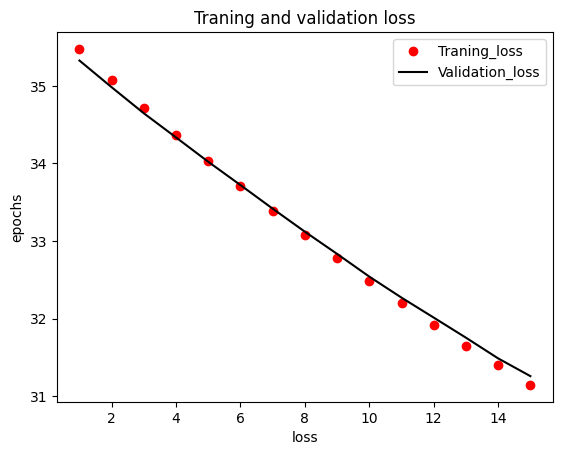

In [61]:
loss_value=history_dict['loss']
val_loss_value=history_dict['val_loss']
epochs=range(1,16)
plt.figure()
plt.plot(epochs,loss_value,'ro',label='Traning_loss')
plt.plot(epochs,val_loss_value,'k-',label='Validation_loss')
plt.title('Traning and validation loss')
plt.xlabel('loss')
plt.ylabel('epochs')
plt.legend()
plt.show()

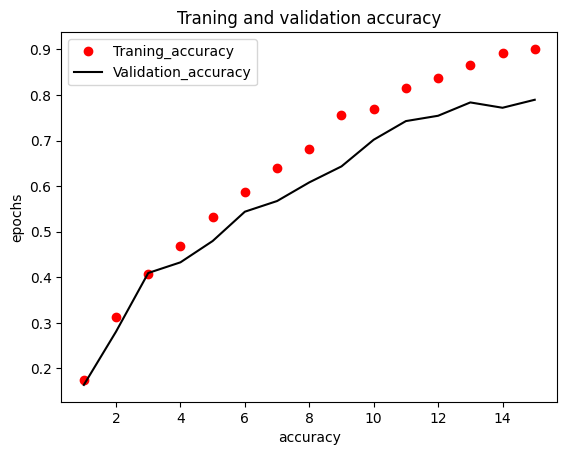

In [62]:
loss_value=history_dict['accuracy']
val_loss_value=history_dict['val_accuracy']
epochs=range(1,16)
plt.figure()
plt.plot(epochs,loss_value,'ro',label='Traning_accuracy')
plt.plot(epochs,val_loss_value,'k-',label='Validation_accuracy')
plt.title('Traning and validation accuracy')
plt.xlabel('accuracy')
plt.ylabel('epochs')
plt.legend()
plt.show()

In [65]:
best_model.save('food_v8.h5')

In [ ]:
# interpreter = tf.lite.Interpreter(model_path="food_v3_int8.tflite")
# interpreter.allocate_tensors()

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
[[0.07460608 0.09322178 0.10080598 0.14469926 0.12791082 0.08366787
  0.11281983 0.14495797 0.11731042]]
7


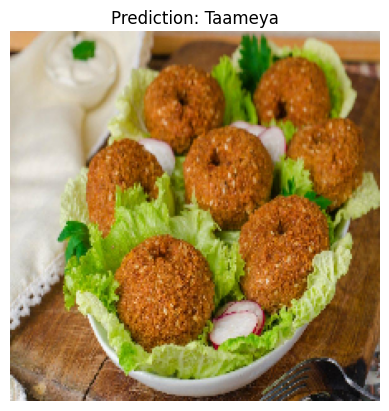

In [63]:
from keras.preprocessing import image
# model = keras.models.load_model(
#     "/kaggle/working/best_model.keras",
#     custom_objects={'preprocess_input': preprocess_input}
# )
img = image.load_img('/kaggle/input/food-photos/food photos/test/Taameya/الطعمية المصرية_25.jpg',
                     target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = best_model.predict(x)
pred_class = np.argmax(preds, axis=1)[0]
print(preds)
print(pred_class)
class_names = [
    "Fattah",
    "Fool",
    "Hawawshy",
    "Koshari",
    "Kunafa",
    "Mahshy El Kosa",
    "Ptata",
    "Taameya",
    "Umm Ali"
]
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {class_names[pred_class]}")
plt.show()


In [66]:
import pandas as pd

results = []
test_dir='/kaggle/input/food-photos/food photos/test'
for dish in os.listdir(test_dir):
    dish_path = os.path.join(test_dir, dish)
    if not os.path.isdir(dish_path):
        continue

    for img_name in os.listdir(dish_path):
        if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(dish_path, img_name)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        preds = best_model.predict(x, verbose=0)
        pred_class = np.argmax(preds, axis=1)[0]
        predicted_label = class_names[pred_class]

        results.append({
            "Dish Folder": dish,
            "Image": img_name,
            "Predicted Label": predicted_label
        })

df = pd.DataFrame(results)
df.to_csv("/kaggle/working/test_predictions_model_3.csv", index=False)
print("test_predictions_model_3.csv")


test_predictions_model_3.csv


In [72]:
setting_training= False
base_model = best_model.get_layer('densenet169')
for layer in base_model.layers:
    if 'conv5_block32' in layer.name:
        setting_training= True
        print(layer.name)
    layer.trainable=setting_training
    # print(layer.trainable)
trainable_count = sum(layer.trainable for layer in base_model.layers)
print(f"Trainable layers: {trainable_count} / {len(base_model.layers)}")

conv5_block32_0_bn
conv5_block32_0_relu
conv5_block32_1_conv
conv5_block32_1_bn
conv5_block32_1_relu
conv5_block32_2_conv
conv5_block32_concat
Trainable layers: 9 / 595


In [73]:
best_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_4 (Lambda)   │ (None, 224, 224,  │          0 │ input_layer_6[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ densenet169         │ (None, 7, 7,      │ 12,642,880 │ lambda_4[0][0]    │
│ (Functional)        │ 1664)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 7, 7,      │ 24,921,728 │ densenet169[0][0] │
│                     │ 1664)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 7, 7,      │ 24,921,728 │ conv2d_8[0][0]    │
│                     │ 1664)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_4          │ (None, 7, 7,      │          0 │ densenet169[0][0… │
│ (Multiply)          │ 1664)             │            │ conv2d_9[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1664)      │          0 │ multiply_4[0][0]  │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 1664)      │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 64)        │    106,560 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 32)        │      2,080 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 9)         │        297 │ dense_13[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 162,500,061 (619.89 MB)

 Trainable params: 50,205,001 (191.52 MB)

 Non-trainable params: 12,390,272 (47.27 MB)

 Optimizer params: 99,904,788 (381.11 MB)

In [74]:
fine_tuned_model = keras.models.load_model(
    "/kaggle/working/best_model.keras",
    custom_objects={'preprocess_input': preprocess_input}
)

fine_tuned_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_4 (Lambda)   │ (None, 224, 224,  │          0 │ input_layer_6[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ densenet169         │ (None, 7, 7,      │ 12,642,880 │ lambda_4[0][0]    │
│ (Functional)        │ 1664)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 7, 7,      │ 24,921,728 │ densenet169[0][0] │
│                     │ 1664)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 7, 7,      │ 24,921,728 │ conv2d_8[0][0]    │
│                     │ 1664)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_4          │ (None, 7, 7,      │          0 │ densenet169[0][0… │
│ (Multiply)          │ 1664)             │            │ conv2d_9[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1664)      │          0 │ multiply_4[0][0]  │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 1664)      │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 64)        │    106,560 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 32)        │      2,080 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 9)         │        297 │ dense_13[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 162,500,061 (619.89 MB)

 Trainable params: 49,952,393 (190.55 MB)

 Non-trainable params: 12,642,880 (48.23 MB)

 Optimizer params: 99,904,788 (381.11 MB)

In [75]:
fine_tuned_model.compile(optimizer=Adam(learning_rate=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
early_stopping_tuned = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint_tuned = ModelCheckpoint('best_model_tuned.keras', monitor='val_loss', save_best_only=True)

In [76]:
fine_tuned_history=fine_tuned_model.fit(train_df,validation_data=valid_df,batch_size=32,epochs=10)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9181 - loss: 30.9900 - val_accuracy: 0.8070 - val_loss: 30.9938
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 235ms/step - accuracy: 0.9235 - loss: 30.6936 - val_accuracy: 0.8304 - val_loss: 30.7493
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 235ms/step - accuracy: 0.9422 - loss: 30.4562 - val_accuracy: 0.8304 - val_loss: 30.4932
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 241ms/step - accuracy: 0.9508 - loss: 30.2053 - val_accuracy: 0.8246 - val_loss: 30.2619
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 243ms/step - accuracy: 0.9768 - loss: 29.9504 - val_accuracy: 0.8187 - val_loss: 30.0368
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 244ms/step - accuracy: 0.9579 - loss: 29.7283 - val_accuracy: 0.8655 - val_loss: 29.7968
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step - accuracy: 0.9627 - loss: 29.4846 - val_accuracy: 0.8363 - val_loss: 29.5753
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 243ms/step - accuracy: 0.9759 - loss: 29.2478 - val

In [77]:
test_loss, test_accuracy=fine_tuned_model.evaluate(test_df)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9127 - loss: 28.8757 
Test Accuracy: 0.9230769276618958
Test loss: 28.85887336730957


In [78]:
history_dict_tuned=fine_tuned_history.history

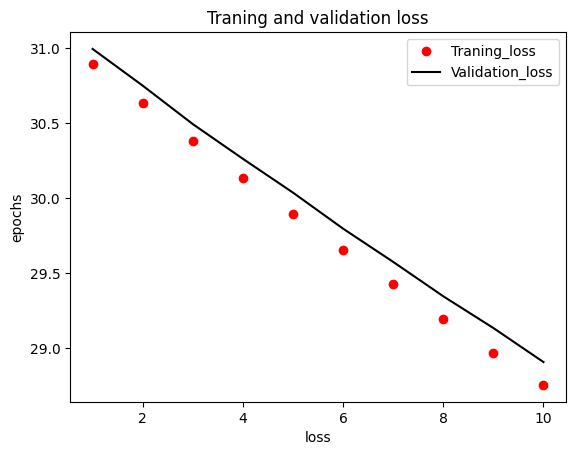

In [79]:
loss_value=history_dict_tuned['loss']
val_loss_value=history_dict_tuned['val_loss']
epochs=range(1,11)
plt.figure()
plt.plot(epochs,loss_value,'ro',label='Traning_loss')
plt.plot(epochs,val_loss_value,'k-',label='Validation_loss')
plt.title('Traning and validation loss')
plt.xlabel('loss')
plt.ylabel('epochs')
plt.legend()
plt.show()

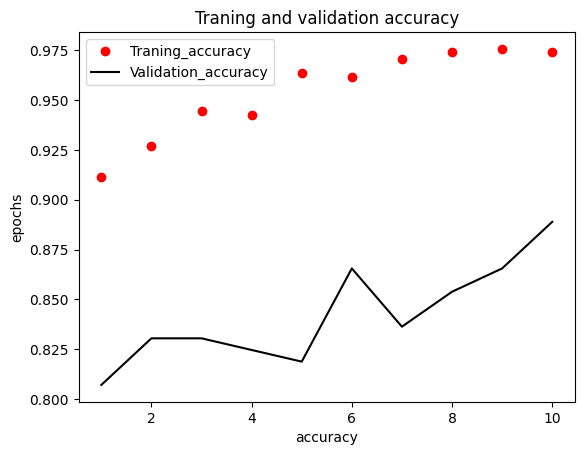

In [80]:
loss_value=history_dict_tuned['accuracy']
val_loss_value=history_dict_tuned['val_accuracy']
epochs=range(1,11)
plt.figure()
plt.plot(epochs,loss_value,'ro',label='Traning_accuracy')
plt.plot(epochs,val_loss_value,'k-',label='Validation_accuracy')
plt.title('Traning and validation accuracy')
plt.xlabel('accuracy')
plt.ylabel('epochs')
plt.legend()
plt.show()

In [81]:
fine_tuned_model.save('model_v8_fine_tuned.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
[[0.07976069 0.08946067 0.09117477 0.12506197 0.12686539 0.1009033
  0.11303259 0.15370028 0.12004039]]
7


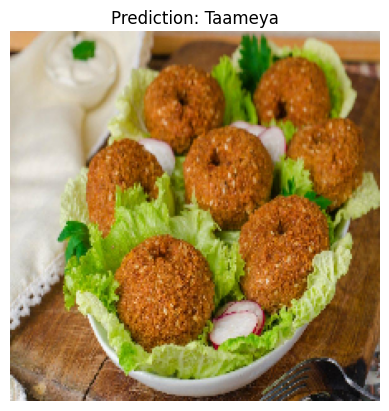

In [82]:
from keras.preprocessing import image
# model = keras.models.load_model(
#     "/kaggle/working/best_model.keras",
#     custom_objects={'preprocess_input': preprocess_input}
# )
img = image.load_img('/kaggle/input/food-photos/food photos/test/Taameya/الطعمية المصرية_25.jpg',
                     target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = fine_tuned_model.predict(x)
pred_class = np.argmax(preds, axis=1)[0]
print(preds)
print(pred_class)
class_names = [
    "Fattah",
    "Fool",
    "Hawawshy",
    "Koshari",
    "Kunafa",
    "Mahshy El Kosa",
    "Ptata",
    "Taameya",
    "Umm Ali"
]
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {class_names[pred_class]}")
plt.show()


In [83]:
import pandas as pd

results = []
test_dir='/kaggle/input/food-photos/food photos/test'
for dish in os.listdir(test_dir):
    dish_path = os.path.join(test_dir, dish)
    if not os.path.isdir(dish_path):
        continue

    for img_name in os.listdir(dish_path):
        if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(dish_path, img_name)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        preds = fine_tuned_model.predict(x, verbose=0)
        pred_class = np.argmax(preds, axis=1)[0]
        predicted_label = class_names[pred_class]

        results.append({
            "Dish Folder": dish,
            "Image": img_name,
            "Predicted Label": predicted_label
        })

df = pd.DataFrame(results)
df.to_csv("/kaggle/working/test_predictions_model_tuned_3.csv", index=False)
print("test_predictions_model_tuned_3.csv")


test_predictions_model_tuned_3.csv


In [84]:
import tensorflow as tf
from keras.applications.densenet import preprocess_input


model = tf.keras.models.load_model(
    "model_v8_fine_tuned.h5",
    custom_objects={'preprocess_input': preprocess_input}
)


def representative_data_gen():
    for images, _ in train_df.take(100):
        yield [tf.cast(images, tf.float32)]
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8
tflite_model = converter.convert()
with open("model_v5_fine_tuned_int8.tflite", "wb") as f:
    f.write(tflite_model)

print("model_v5_fine_tuned.tflite")


Saved artifact at '/tmp/tmp0hbrkcip'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_6')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  140649173029072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140649173032144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140649173032336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140649173035408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140649173030992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140649173035024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140649173034832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140649173034448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140649173033104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140649173030224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1406491730294

/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/convert.py:997: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
W0000 00:00:1760694781.628196      37 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1760694781.628240      37 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1760694782.078209      37 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
fully_quantize: 0, inference_type: 6, input_inference_type: UINT8, output_inference_type: UINT8


model_v5_fine_tuned.tflite
